# Quantitative Lab: Week 3
## Radhika Jangi

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

### 1. PCA of genotype data

This principal component analysis is done through plink with a renumbered genotype file from roman numerals to regular numeric equivalencies

In [6]:
%%bash
plink --vcf renumbered.vcf --pca --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --mind
  --pca
  --vcf renumbered.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%

In [7]:
%%bash
head plink.eigenvec

A01 01 0.0293777 0.0187452 0.0221747 0.0445282 -0.0017888 -0.0508647 0.0217531 0.0296259 -0.0158424 -0.0578691 0.0265217 0.0168406 -0.00624554 -0.00694047 -0.0188674 0.00540447 -0.0150763 0.0331427 -0.0241464 -0.0319716
A01 02 -0.0178869 -0.0153446 -0.00963119 -0.0680471 0.0592403 -0.0397113 -0.0294007 -0.072011 0.00333541 -0.0133644 0.0160004 0.0328675 0.0069063 0.00238534 -0.00589107 0.0270326 0.0180259 -0.0247122 -0.0126887 0.00700803
A01 03 -0.0134291 -0.0147874 -0.0549097 -0.038837 0.0418521 -0.0214211 -0.0257296 0.0456094 0.0116589 -0.00147454 -0.0431162 0.0365349 0.00628182 0.00818612 -0.0136737 -0.0470688 0.0268723 0.0119778 0.0188035 -0.00552268
A01 04 0.0239538 -0.0692065 0.000776901 0.0096754 -0.0227956 -0.0314882 0.0279066 -0.0212767 0.012735 0.027827 -0.0123955 -0.0467095 -0.00323519 -0.00511129 -0.0204711 -0.0307232 0.0159636 0.0571138 -0.0280914 0.0531803
A01 05 -0.0367941 0.0705138 0.0232567 -0.0104185 -0.0173224 -0.00609715 -0.0173088 0.00657063 -0.0473247 0.0264144 0.

In [129]:
# Separate eigenvectors into PCs
df_pca = pd.read_csv("plink.eigenvec", sep = ' ', header = None)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.029378,0.018745,0.022175,0.044528,-0.001789,-0.050865,0.021753,0.029626,...,0.026522,0.016841,-0.006246,-0.006940,-0.018867,0.005404,-0.015076,0.033143,-0.024146,-0.031972
1,A01,2,-0.017887,-0.015345,-0.009631,-0.068047,0.059240,-0.039711,-0.029401,-0.072011,...,0.016000,0.032868,0.006906,0.002385,-0.005891,0.027033,0.018026,-0.024712,-0.012689,0.007008
2,A01,3,-0.013429,-0.014787,-0.054910,-0.038837,0.041852,-0.021421,-0.025730,0.045609,...,-0.043116,0.036535,0.006282,0.008186,-0.013674,-0.047069,0.026872,0.011978,0.018804,-0.005523
3,A01,4,0.023954,-0.069207,0.000777,0.009675,-0.022796,-0.031488,0.027907,-0.021277,...,-0.012396,-0.046710,-0.003235,-0.005111,-0.020471,-0.030723,0.015964,0.057114,-0.028091,0.053180
4,A01,5,-0.036794,0.070514,0.023257,-0.010419,-0.017322,-0.006097,-0.017309,0.006571,...,0.039460,-0.014528,0.002385,-0.015274,0.016490,0.032988,0.012756,0.025461,-0.015445,-0.031543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.026606,0.032423,0.071461,0.010042,0.034463,-0.001477,-0.002375,-0.015118,...,0.003805,0.034901,-0.033627,-0.008241,-0.002863,-0.032656,-0.028643,0.018956,-0.002176,0.023879
947,A11,93,-0.008119,-0.010684,-0.050010,-0.035384,0.048263,0.002550,-0.051717,-0.040367,...,-0.001955,-0.000349,-0.009283,-0.016167,0.001374,-0.039100,-0.017596,0.023039,-0.000226,0.025441
948,A11,94,-0.001145,0.060205,0.001088,-0.005471,0.000833,0.053251,-0.008853,0.019402,...,-0.053303,0.025990,0.066653,0.049832,-0.034562,-0.073626,-0.029021,-0.043632,-0.019187,0.065169
949,A11,95,-0.002577,0.051168,0.009742,-0.007548,-0.028898,0.052776,-0.010332,0.005138,...,-0.027829,0.045514,0.000397,-0.026079,-0.015475,-0.028324,-0.001001,0.015677,-0.021918,-0.004906


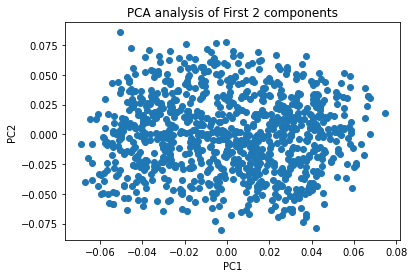

In [130]:
fig, ax = plt.subplots()
ax.scatter(x = df_pca[2], y = df_pca[3])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA analysis of First 2 components')
plt.show()

### 2. Allele Frequencies

Picks out the allele frequencies from the genotype file, which is sans header

In [10]:
%%bash

grep -v "##" renumbered.vcf > genotype.vcf

In [11]:
#8th column (INFO)
f = open('genotype.vcf', 'r')
genotypes = f.readlines()
f.close()

In [12]:
allele_freq = []
for line in genotypes:
    if '#' in line: # Toss header lines
        continue
    else:
        line = line.split()
        info = line[7]
        AF = info[3:-1]
        #print(len(AF))
        if len(AF) == 0: # Toss empty AF values
            continue
        else:
            if ',' in AF:
                AF_spl = AF.split(',') # 
                for af in AF_spl:
                    af = float(af)
                    allele_freq.append(af)
            else:
                AF = float(AF)
                allele_freq.append(AF) # Append to list
print(allele_freq)

[0.6902, 0.71047, 0.56577, 0.50393, 0.71267, 0.7134, 0.6959, 0.49349, 0.4961, 0.521, 0.52956, 0.52458, 0.51883, 0.52252, 0.51903, 0.54036, 0.53652, 0.52807, 0.5259, 0.52212, 0.53037, 0.51525, 0.5369, 0.52575, 0.52824, 0.5303, 0.52783, 0.51957, 0.53785, 0.53287, 0.53096, 0.53444, 0.53174, 0.54248, 0.53312, 0.53803, 0.51952, 0.53343, 0.53202, 0.53377, 0.5371, 0.53, 0.52116, 0.52446, 0.52081, 0.52507, 0.52434, 0.53096, 0.52636, 0.53232, 0.5299, 0.5365, 0.527, 0.52482, 0.5207, 0.52085, 0.52794, 0.48148, 0.52009, 0.51886, 0.52197, 0.5235, 0.52402, 0.52489, 0.53232, 0.53141, 0.51773, 0.51625, 0.52056, 0.5197, 0.52058, 0.51576, 0.51976, 0.51344, 0.51402, 0.52087, 0.52605, 0.52764, 0.51633, 0.52432, 0.51967, 0.5233, 0.51481, 0.51718, 0.51473, 0.50958, 0.514, 0.51, 0.51598, 0.5176, 0.52, 0.51689, 0.51829, 0.53182, 0.52038, 0.52402, 0.52446, 0.52107, 0.51775, 0.52618, 0.52171, 0.53093, 0.54119, 0.53046, 0.52815, 0.5276, 0.5318, 0.53065, 0.53051, 0.52314, 0.52631, 0.52542, 0.522, 0.5154, 0.51994,

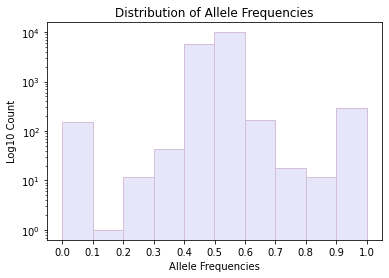

In [13]:
fig, ax = plt.subplots()
ax.hist(allele_freq, bins = 10, color= ['lavender'], edgecolor = "thistle", linewidth = 1)
plt.yscale('log')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title('Distribution of Allele Frequencies')
plt.xlabel('Allele Frequencies')
plt.ylabel('Log10 Count')
plt.show()

### 3. GWAS

Conducts GWAS through plink

In [16]:
linechange = open('BYxRM_PhenoData.txt', 'r')
changed = open('phenotype.txt', 'w')
lbl = linechange.readlines()
linechange.close()
for line in lbl:
    if "Caffeine" in line: # modify header
        line = "FID" + "\t" + "IID" + line
    else: # all the other lines
        cat = line.split("_")
        line = cat[0] + "\t" + cat[1]
    changed.write(line)
changed.close()

In [17]:
%%bash
plink \
  --vcf renumbered.vcf \
  --pheno phenotype.txt \
  --linear \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10 \
  --all-pheno

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno phenotype.txt
  --vcf renumbered.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%

### 4. Manhattan and QQ Plots

Plots Manhattan and QQ plots for each phenotype

In [18]:
phenotype_list = ["Cadmium_Chloride", "Caffeine", "Calcium_Chloride", "Cisplatin", "Cobalt_Chloride", "Congo_red", "Copper", "Cycloheximide", "Diamide", "E6_Berbamine", "Ethanol", "Formamide", "Galactose", "Hydrogen_Peroxide", "Hydroquinone", "Hydroxyurea", "Indoleacetic_Acid", "Lactate", "Lactose", "Lithium_Chloride", "Magnesium_Chloride", "Magnesium_Sulfate", "Maltose", "Mannose", "Menadione", "Neomycin", "Paraquat", "Raffinose", "SDS", "Sorbitol", "Trehalose", "Tunicamycin", "x4-Hydroxybenzaldehyde", "x4NQO", "x5-Fluorocytosine", "x5-Fluorouracil", "x6-Azauracil", "Xylose", "YNB", "YNB:ph3", "YNB:ph8", "YPD", "YPD:15C", "YPD:37C", "YPD:4C", "Zeocin"]

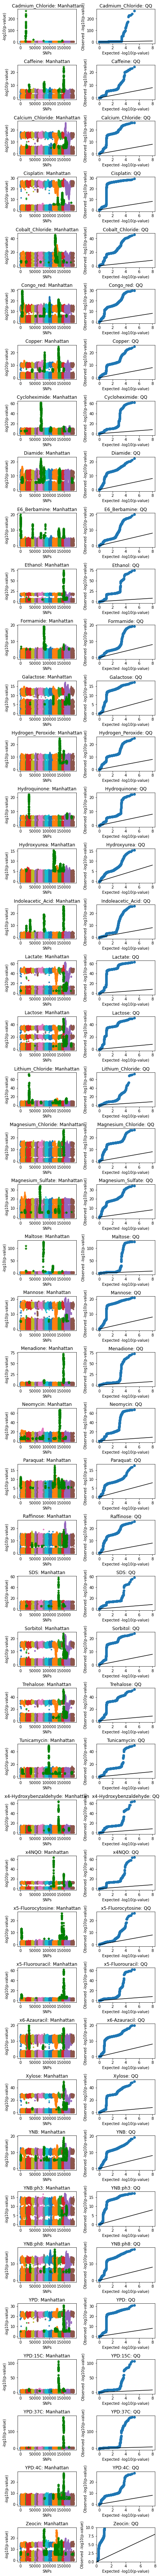

In [108]:
fig, ax = plt.subplots(nrows = 46, ncols = 2)
 
fig.set_figheight(96)
for i in range(len(phenotype_list)):
    gwas = pd.read_csv("plink." + phenotype_list[i] + ".assoc.linear", sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    gwas['snp_index'] = range(len(gwas))
    
    for chr in range(1, 23): 
        ax[i][0].scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')
        

    pval_df = gwas.loc[gwas['P']<1e-5]
    pval_df = pval_df.loc[pval_df['TEST']=='ADD']
    ax[i][0].scatter(pval_df["snp_index"], pval_df["logP"], color = 'green', marker = '*')
    
    ax[i][0].set_title(phenotype_list[i] + ': Manhattan')
    ax[i][0].set_xlabel("SNPs")
    ax[i][0].set_ylabel("-log10(p-value)")
    
    
    gwas_sorted = gwas.sort_values(by = "P")
    #gwas_sorted
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])

    gwas['snp_index'] = range(len(gwas))
    ax[i][1].scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax[i][1].plot([8,0], [8, 0], color = "black")

    plt.xlim([0, 8])
    plt.ylim([0, 10])
    ax[i][1].set_xlabel("Expected -log10(p-value)")
    ax[i][1].set_ylabel("Observed -log10(p-value)")
    ax[i][1].set_title(phenotype_list[i] + ': QQ')
    
plt.tight_layout()
plt.show()

### Genotype/Phenotype boxplots

I picked caffeine to plot the phenotype values separated by genotype for the most common SNP

In [117]:
caffeine_df = pd.read_csv("plink.Caffeine.assoc.linear", sep = "\s+")

caffeine_df['logP'] = -1 * np.log10(caffeine_df['P'])
caffeine_df['snp_index'] = range(len(caffeine_df))
caffeine_df

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,1,.,1074,C,ADD,847,-0.06125,-1.3030,0.19300,0.714443,0
1,1,.,1074,C,COV1,847,-2.22100,-2.3660,0.01819,1.740167,1
2,1,.,1074,C,COV2,847,2.01700,2.1690,0.03036,1.517698,2
3,1,.,1074,C,COV3,847,-2.03000,-2.1230,0.03403,1.468138,3
4,1,.,1074,C,COV4,847,1.06200,1.1110,0.26700,0.573489,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,16,.,942826,G,COV6,852,-0.40240,-0.4166,0.67710,0.169347,182859
182860,16,.,942826,G,COV7,852,0.43320,0.4483,0.65400,0.184422,182860
182861,16,.,942826,G,COV8,852,-0.15730,-0.1624,0.87100,0.059982,182861
182862,16,.,942826,G,COV9,852,-1.50400,-1.5520,0.12100,0.917215,182862


In [118]:
caffeine_df.sort_values(by='logP', ascending=False, inplace = True)

In [119]:
caffeine_df

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
148951,14,.,466103,G,ADD,900,0.3089,10.70,3.198000e-25,24.495122,148951
148984,14,.,467219,A,ADD,910,0.2996,10.36,7.480000e-24,23.126098,148984
148742,14,.,445766,A,ADD,907,-0.2979,-10.31,1.285000e-23,22.891097,148742
148962,14,.,466588,T,ADD,908,0.2950,10.30,1.411000e-23,22.850473,148962
148918,14,.,464117,A,ADD,902,0.2948,10.10,8.554000e-23,22.067831,148918
...,...,...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,847,NaN,NaN,NaN,NaN,182089
182090,16,.,890346,T,COV7,847,NaN,NaN,NaN,NaN,182090
182091,16,.,890346,T,COV8,847,NaN,NaN,NaN,NaN,182091
182092,16,.,890346,T,COV9,847,NaN,NaN,NaN,NaN,182092


In [120]:
common_snp = '466103'
common_chr = 'XIV'

In [121]:
#take list of geno @ specific chr and BP
fs = open('BYxRM_segs_saccer3.bam.simplified.vcf', 'r')
f = open('BYxRM_PhenoData.txt', 'r')
genotypes = fs.readlines()
phenotypes = f.readlines()
fs.close()
f.close()

In [132]:
pheno_vals = []
for line in phenotypes:
    if 'Cadmium_Chloride' in line:
        continue
    else:
        pheno_vals.append((line.split()[2])) # Selects caffeine column and pheno val

In [133]:
# Creates dictionary of each genotype with list of associated phenotype values
geno_dict = {'0/0':[],'0/1':[],'1/1':[], './.': []}
for line in genotypes:
    if common_chr in line and common_snp in line:
        genos = line.split('\t')
        genos = genos[9:-1]
        for i in range(len(pheno_vals)): 
            GT = genos[i].split(':')
            if pheno_vals[i] != 'NA':
                geno_dict[GT[0]].append(float(pheno_vals[i]))
print(geno_dict)

{'0/0': [0.878392426706617, 1.65543601155822, 1.75034183470112, -2.78732802734834, 1.1936299100528, 2.28756907546804, -1.23662943561707, 0.986638980212868, 1.64882407068632, -0.383579885810046, 1.20767609354278, 1.74877566785109, 0.0859887163887626, 0.602951891424298, 0.166271305192986, 0.71879682832223, 0.477383312841389, -0.0326848931483682, -1.20719957715925, 0.685338856140402, 1.06307349621769, 2.42245931061886, -0.114293167185351, -0.688879430551241, -0.773777717833132, 0.789964198938128, 0.0260497074151634, 0.711589391508188, 0.242479988144909, -0.0371342771431309, 1.30575750281729, -0.260022822314755, -0.389854933942164, -1.84649751425565, 0.028883077998905, -0.992202669413734, 1.18830635160574, 0.159006327224244, -0.343026163433977, 1.07314354115615, -0.20229591634253, -0.198842419456614, -0.975024647720848, -0.585988427014682, 0.978867443336943, -0.185251223771768, -0.718422428862273, 0.828675732373758, -0.812466797191972, 0.951216158531104, -0.745209717726631, 0.6217932892608

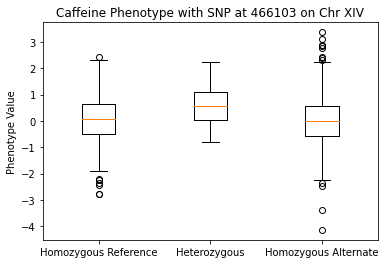

In [128]:
fig, ax = plt.subplots()
data = list(geno_dict.values())
plt.boxplot(data[:3])
ax.set_xticklabels(['Homozygous Reference', 'Heterozygous', 'Homozygous Alternate'])
plt.title('Caffeine Phenotype with SNP at 466103 on Chr XIV')
plt.ylabel('Phenotype Value')
plt.show()